# Multi Layer Perceptron ( MLP )

**OBJECTIVE :**
* To find the best MLP model for digit recognization. 

**NOTE :**

1.   Here we have used MNIST dataset .
2.   We have used  activation function as " ReLU " and optimizer as " Adam ".

1.   Here we have considered 3 MLP models :-


 *   784 - 512 - 128 - 10 ( 2 hidden layer MLP )
 *   784 - 512 - 360 - 256 - 10 ( 3 hidden layer MLP )
 *   784 - 512 - 256 - 128 - 64 - 36 - 10 ( 5 hidden layer MLP )












**IMPORTING LIBRARIES AND OUR DATASET**

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Reshaping our X_train and X_test from a 3 dimensional - vector ( 60000 , 28 , 28 ) to a 2 dimensional vector ( 60000 , 784 ).

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

Data set Normalizing .

In [0]:
X_train = X_train/255
X_test = X_test/255

**1. 784 - 512 - 128 - 10 ( 2 hidden layer MLP )**

**1.1 Without DropOut and batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [119]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.0916401368765869
Test accuracy: 0.9808


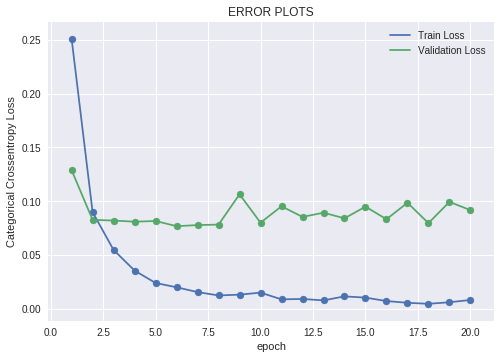

In [120]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


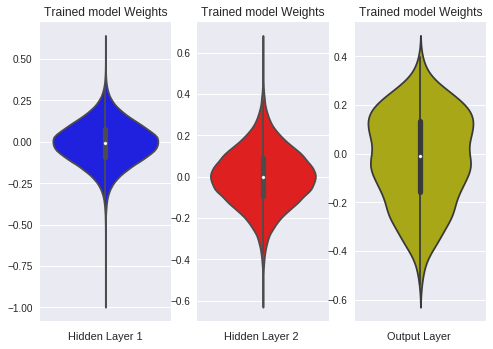

In [121]:
w_after = model_Relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.2  Without DropOut but with batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [113]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.08171896521180678
Test accuracy: 0.9802


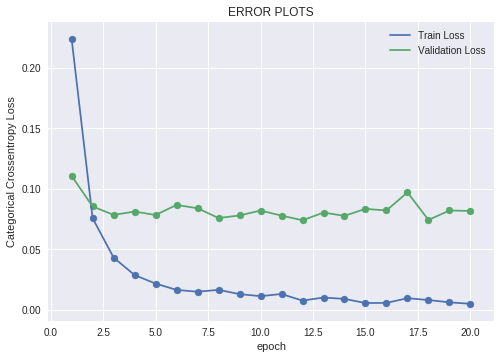

In [114]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


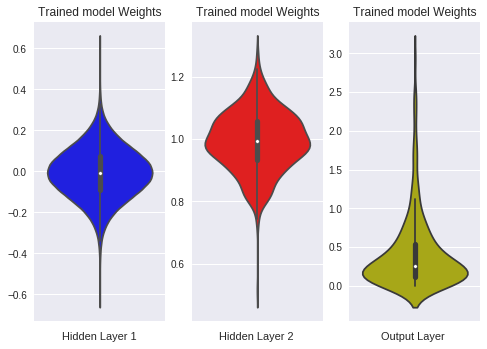

In [115]:
w_after = model_Relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.3  With DropOut and without batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [48]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.06875675433564211
Test accuracy: 0.9825


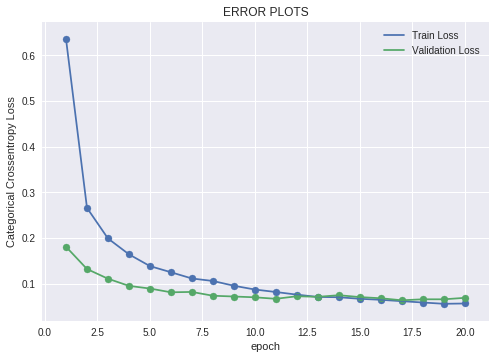

In [49]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


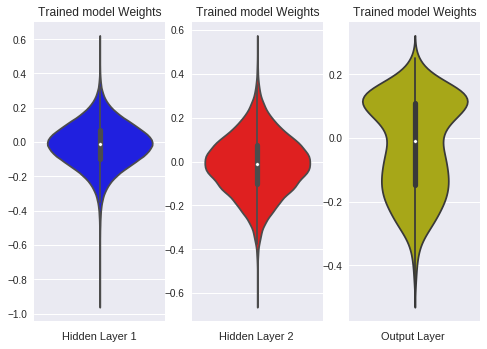

In [50]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.4  With DropOut and batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [107]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.058789471265883186
Test accuracy: 0.9831


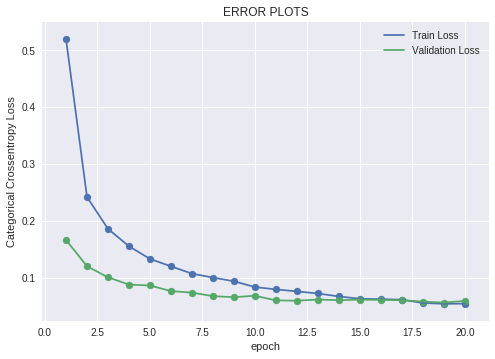

In [108]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


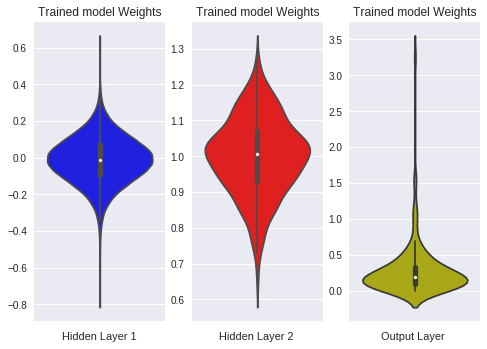

In [109]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**OBSERVATIONS.**

*   The performance of model having both dropout and batch-normalization is the highest with Test accuracy: 0.9831 .
*   The performance of model without having dropout and batch-normalization is the lowest with Test accuracy: 0.9802 .
*   The performance of models having both dropout and batch-normalization and another having only dropout is almost similar. 



**2. 784 - 512 - 360 - 256 - 10 ( 3 hidden layer MLP )**

**2.1 Without DropOut and batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(360, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [101]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.09833854563205828
Test accuracy: 0.9812


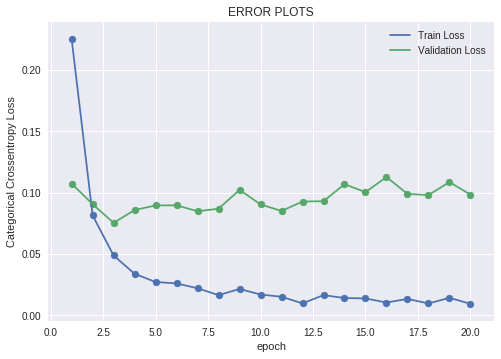

In [102]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


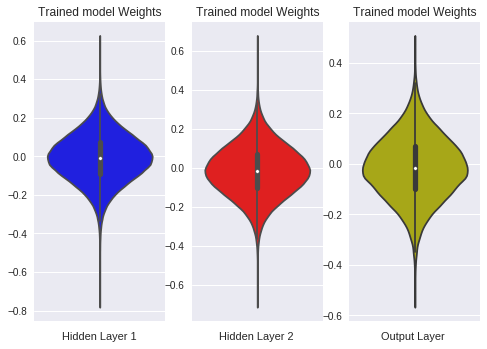

In [103]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.2  Without DropOut but with batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(360, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [95]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.06863814794758946
Test accuracy: 0.9832


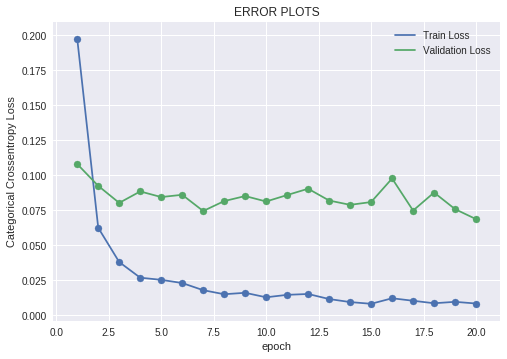

In [96]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


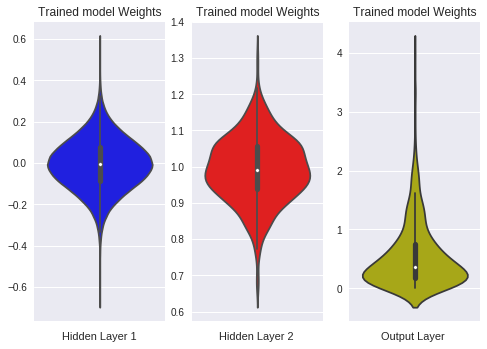

In [97]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.3  With DropOut and without batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(360, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [84]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.07562761397457653
Test accuracy: 0.9787


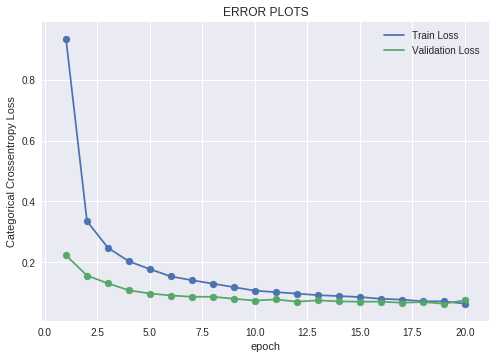

In [85]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


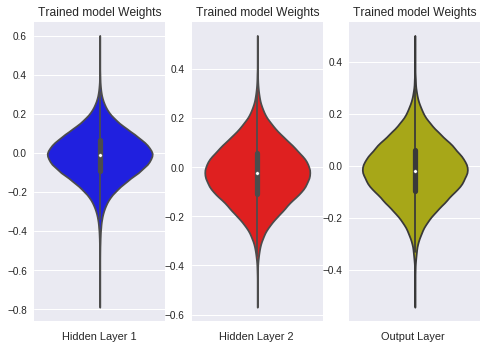

In [86]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.4  With DropOut and batch normalization**

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(360, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_Relu.summary()

In [89]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.058890959375922106
Test accuracy: 0.9823


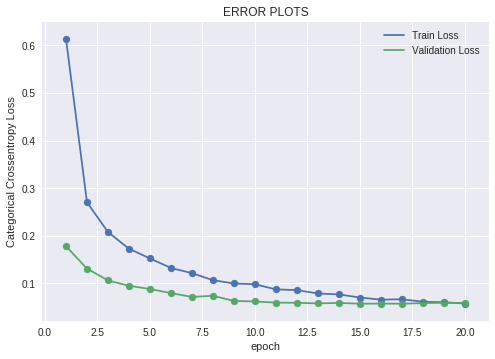

In [90]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


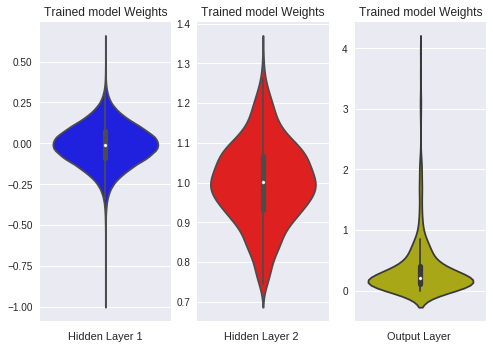

In [91]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**OBSERVATIONS.**

*   The performance of model having only batch-normalization is the highest with Test accuracy: 0.9832 .
*   The performance of model with having dropout but not batch-normalization is the lowest with Test accuracy: 0.9787 .
*   Model having dropout are more stable .




**3. 784 - 512 - 256 - 128 - 64 - 36 - 10 ( 5 hidden layer MLP )**

**3.1 Without DropOut and batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(36, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [126]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.08497615160796104
Test accuracy: 0.9808


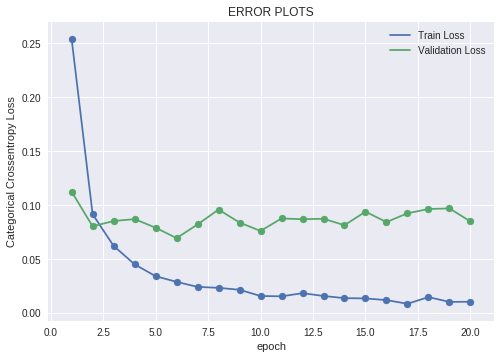

In [127]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


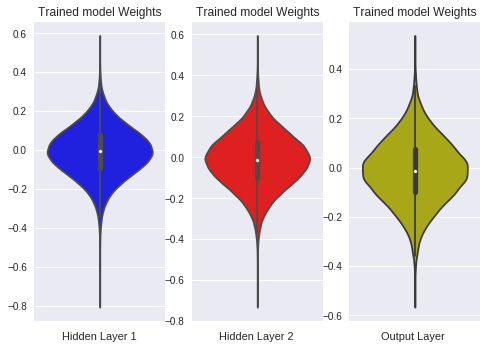

In [128]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.2  Without DropOut but with batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(36, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [132]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.10287071234539326
Test accuracy: 0.9765


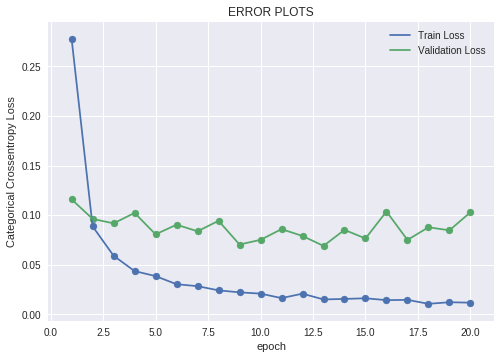

In [133]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


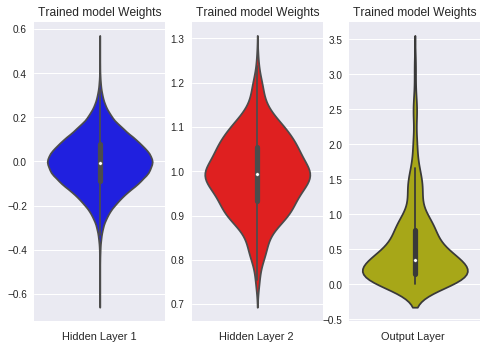

In [134]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.3  With DropOut and without batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(36, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [138]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.12207341571632424
Test accuracy: 0.9782


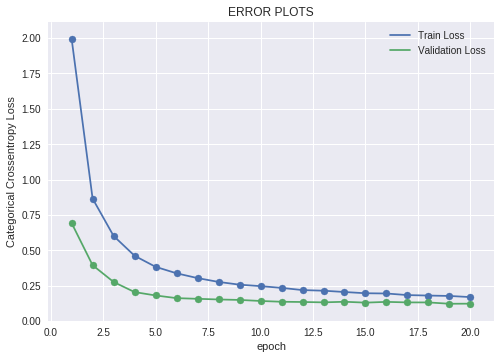

In [139]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


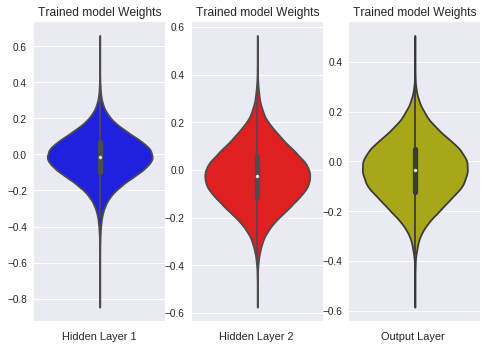

In [140]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.4  With DropOut and batch normalization**

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
model_Relu = Sequential()

In [0]:
model_Relu.add(Dense(512, activation='relu', input_shape=(input_dim,) , kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(36, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_Relu.add(BatchNormalization())
model_Relu.add(Dropout(0.5))
model_Relu.add(Dense(output_dim, activation='softmax'))
model_Relu.summary()
model_Relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model_Relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

In [144]:
score = model_Relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.07616790271021891
Test accuracy: 0.9818


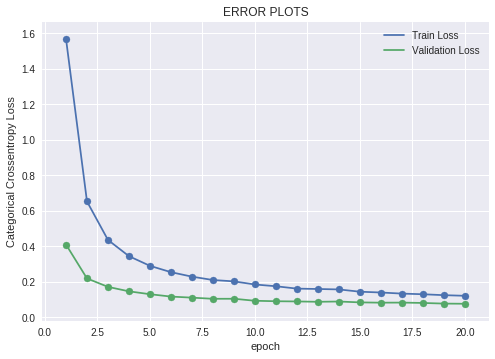

In [145]:
plt.plot(list(range(1,nb_epoch+1)),history.history['loss'], label='Train Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['loss'])
plt.plot(list(range(1,nb_epoch+1)),history.history['val_loss'], label='Validation Loss')
plt.scatter(list(range(1,nb_epoch+1)),history.history['val_loss'])
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("ERROR PLOTS")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


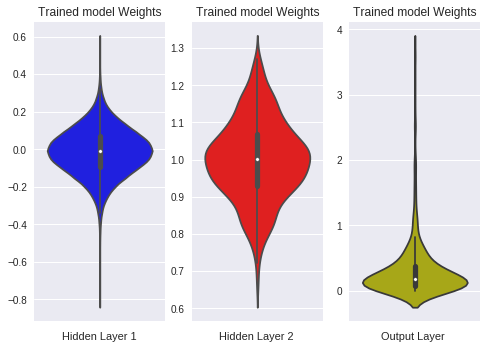

In [146]:
w_after = model_Relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**OBSERVATIONS.**

*   The performance of model having both dropout and batch-normalization is the highest with Test accuracy: 0.9818 .
*   The performance of model only having batch-normalization is the lowest with Test accuracy: 0.9765 .



**FINAL TABLE**

In [147]:
x = PrettyTable()
x.field_names = ["MODEL", "BATCH_NORMALIZATION", "DROP_OUT", "TEST_LOSS" , "TEST_ACCURACY"]
x.add_row(["2 hidden layer MLP","NO","NO",0.0916,0.9808])
x.add_row(["2 hidden layer MLP","YES","NO",0.0817,0.9802])
x.add_row(["2 hidden layer MLP","NO","YES",0.0687,0.9825])
x.add_row(["2 hidden layer MLP","YES","YES",0.0588,0.9831])
x.add_row(["3 hidden layer MLP","NO","NO",0.0983,0.9812])
x.add_row(["3 hidden layer MLP","YES","NO",0.0686,0.9832])
x.add_row(["3 hidden layer MLP","NO","YES",0.0756,0.9787])
x.add_row(["3 hidden layer MLP","YES","YES",0.0588,0.9823])
x.add_row(["5 hidden layer MLP","NO","NO",0.0849,0.9808])
x.add_row(["5 hidden layer MLP","YES","NO",0.1028,0.9765])
x.add_row(["5 hidden layer MLP","NO","YES",0.1220,0.9782])
x.add_row(["5 hidden layer MLP","YES","YES",0.0761,0.9818])
print(x)

+--------------------+---------------------+----------+-----------+---------------+
|       MODEL        | BATCH_NORMALIZATION | DROP_OUT | TEST_LOSS | TEST_ACCURACY |
+--------------------+---------------------+----------+-----------+---------------+
| 2 hidden layer MLP |          NO         |    NO    |   0.0916  |     0.9808    |
| 2 hidden layer MLP |         YES         |    NO    |   0.0817  |     0.9802    |
| 2 hidden layer MLP |          NO         |   YES    |   0.0687  |     0.9825    |
| 2 hidden layer MLP |         YES         |   YES    |   0.0588  |     0.9831    |
| 3 hidden layer MLP |          NO         |    NO    |   0.0983  |     0.9812    |
| 3 hidden layer MLP |         YES         |    NO    |   0.0686  |     0.9832    |
| 3 hidden layer MLP |          NO         |   YES    |   0.0756  |     0.9787    |
| 3 hidden layer MLP |         YES         |   YES    |   0.0588  |     0.9823    |
| 5 hidden layer MLP |          NO         |    NO    |   0.0849  |     0.98

**Summary**

*   Our first model is a MLP having 2 hidden layers ( 784 - 512 - 128 - 10 ) . We have build to various type of this structured model like model with only dropout , with only batch normalization , without both of them , with both of them and compare all the models with each other . We found that the model having both dropout and normalization is more stable and gives better accuracy on test dataset ( 0.9831 ) .
*   Our secod model is a MLP having 3 hidden layers ( 784 - 360 - 256 - 10 ) . We have build to various type of this structured model like model with only dropout , with only batch normalization , without both of them , with both of them and compare all the models with each other . We found that the model having only normalization gives better accuracy on test dataset ( 0.9832 ) but the model having both are more stable .
*   Our first model is a MLP having 5 hidden layers ( 784 - 256 - 128 - 64 - 36 - 10 ) . We have build to various type of this structured model like model with only dropout , with only batch normalization , without both of them , with both of them and compare all the models with each other . We found that the model having both dropout and normalization is more stable and gives better accuracy on test dataset ( 0.9818 ) .


**Conclusion**

*   The model having 2 hidden layers ( 784 - 512 - 128 - 10 ) and build with dropout and batch normalization has the highest accuracy on test dataset (0.9831 ).
*   The model having 5 hidden layers ( 784 - 256 - 128 - 64 - 36 - 10 ) and build with dropout and batch normalization has the lowest accuracy on test dataset (0.9765 ).
*   Shallow MLP models ( 2 hidden layered ) performs better than any other models . 
*   As the layers of MLP increases the performance of our model decreases because of overfitting , etc .
*   For shallow MLP models dropout , affects the model results very much and batch - normalization don't affect much .
*   For non shallow MLP models , batch - normalization has hugh impact on the model results .

